# Fuzzy logic introduction
## Installation: 
* pip install -U scikit-fuzzy
* pip install networkx==1.3
    * networkx==2.0 has drastical changes in the code

## Tasks:
* Make the tip recommendation system more interactive with annotator
* Make more fine grained levels, i.e. (bad,descent,great) -> (poor,bad,average,descent,great) and add rules for them
* Add new Antecednets variable: interior, quota and add rules for them


# The Tipping Problem
Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

## Antecednets (Inputs)
* service
    * Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10?
    * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
* food quality
    * Universe: How tasty was the food, on a scale of 1 to 10?
    * Fuzzy set: bad, decent, great

## Consequents (Outputs)
* tip
    * Universe: How much should we tip, on a scale of 0% to 25%
    * Fuzzy set: low, medium, high
* Rules
    * IF the service was good or the food quality was good, THEN the tip will be high.
    * IF the service was average, THEN the tip will be medium.
    * IF the service was poor and the food quality was poor THEN the tip will be low.
* Usage
    * If I tell this controller that I rated:
        * the service as 9.8, and
        * the quality as 6.5,
    * it would recommend I leave:
        * a 20.2% tip.

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
given_quality=6.5
given_service=6.5
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

quality.automf(5)
service.automf(5)


tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

C:\Users\kuka0\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


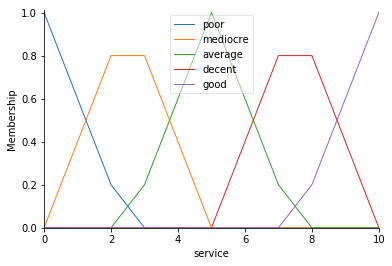

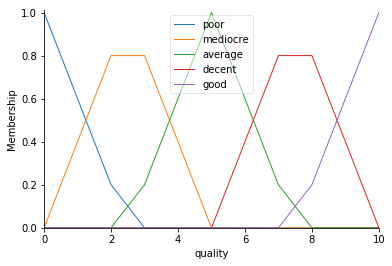

In [13]:
%matplotlib inline
service.view()
quality.view()

In [3]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

In [4]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [22]:
tipping.input['quality'] = given_quality
tipping.input['service'] = given_service
tipping.compute()

NameError: name 'given_quality' is not defined

Recommended tip 19.847607362


C:\Users\kuka0\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


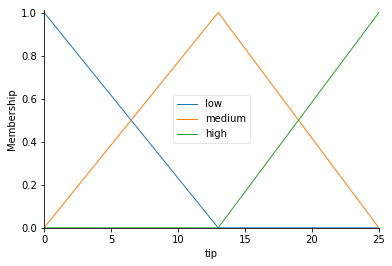

In [21]:
print('Recommended tip',tipping.output['tip'])
tip.view(sim=tipping)